# Let's build and train a Deep Neural Network(DNN) to classify mnist data!

# 使用 Keras 建立神經網絡
[Keras](https://keras.io/)是一個在[Python](https://www.python.org/)上面運行的類神經網路API，能夠以數個機器學習框架作為後端運行，包括[TensorFlow](https://www.tensorflow.org/), [CNTK](https://www.microsoft.com/en-us/cognitive-toolkit/)和[Theano](http://deeplearning.net/software/theano/)。

![](https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png =550x) <br>
Keras 包含許多深度學習神經層、函數以及許多熱門模型( model )，這將有助於加速我們深度學習專案開發。

## 導入所需的函式庫 Import necessary Python libraries

In [1]:
% matplotlib inline
import tensorflow as tf
import numpy as np
import pandas as pd
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Activation, Dense, Dropout
from matplotlib import pyplot as plt
from keras import backend as K
K.tensorflow_backend._get_available_gpus()
import os

epochs = 3
batch_size = 128
num_classes = 10

Using TensorFlow backend.


## Device information 硬體資訊

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17030309884093444940
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 12877325385462341389
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 6677189175980739542
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11281553818
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1825970846239239185
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


# 輸入資料
**MNIST**是一個手寫數字的圖片資料集，具有60000張訓練集圖片，10000張測試集圖片，每張圖片的大小為28\*28像素。<br>
![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png =400x)
<br>

- 將圖片送入神經網路訓練以及測試之前，我們需要先將圖片轉換成平坦的陣列（784\*1）<br>
![](https://www.cntk.ai/jup/cntk103a_MNIST_input.png =400x)

- 此外，我們亦須將圖片的標籤從數字轉換成One-Hot陣列，例如：將5轉換成 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
<br>
![](https://www.tensorflow.org/images/feature_columns/categorical_column_with_identity.jpg =400x)



## Prepare data 下載所需的手寫數字圖片資料集和處理

In [0]:
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# convert labales to categories, ex. 5 -> [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
y_train_OneHot = keras.utils.to_categorical(y_train, num_classes)
y_test_OneHot = keras.utils.to_categorical(y_test, num_classes)

In [0]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: 
        num=25
    for i in range(0,num):
        ax=plt.subplot(5,5, 1+i) # 建立子圖形為5x5
        image = np.reshape(images[idx],(28,28))
        ax.imshow(image, cmap='binary') # 畫出子圖形
        l = labels[idx]
        title= "label= " + str(l) # 宣告子圖形title字串,並加上標籤欄位
        if len(prediction)>0: 
            p = prediction[idx]
            title+=" ,predict= " + str(prediction[p]) # 若有預測結果,title加上預測結果
        ax.set_title(title,fontsize=12) # 設定title與大小
        ax.set_xticks([]);ax.set_yticks([]) # 設定不顯示刻度
        idx+=1 
    plt.show()

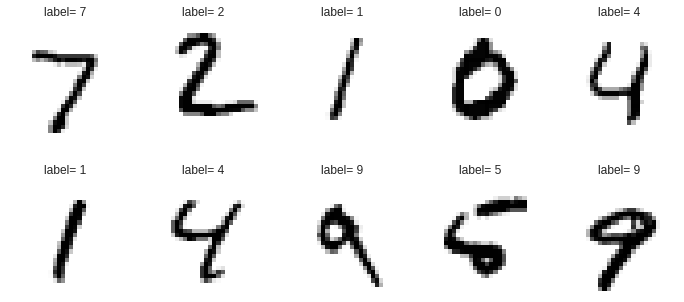

In [5]:
plot_images_labels_prediction(x_test, y_test, [], 0 , 10)

## Build DNN model

In [0]:
inputs = Input(shape=(784,))
m = Dense(512)(inputs)
m = Activation('relu')(m)
m = Dropout(0.2)(m)
m = Dense(512)(m)
m = Activation('relu')(m)
m = Dropout(0.2)(m)
m = Dense(num_classes)(m)
outputs = Activation('softmax')(m)
model = Model(inputs=inputs, outputs=outputs)

## Show model overview

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
__________

## Compile model

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

## Start training!

In [9]:
history = model.fit(x_train, y_train_OneHot,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test_OneHot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 4s 69us/step - loss: 0.2874 - acc: 0.9129 - val_loss: 0.1262 - val_acc: 0.9606
Epoch 2/3
60000/60000 [==============================] - 4s 62us/step - loss: 0.1135 - acc: 0.9653 - val_loss: 0.0852 - val_acc: 0.9747
Epoch 3/3
60000/60000 [==============================] - 4s 63us/step - loss: 0.0793 - acc: 0.9753 - val_loss: 0.0690 - val_acc: 0.9786


## Test loss/accuracy

In [10]:
score = model.evaluate(x_test, y_test_OneHot, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06895317872529849
Test accuracy: 0.9786


## Save keras model

In [0]:
# model_dir = 'keras-model'
# model_h5 = 'model.h5'
# model_json = 'model.json'
# model_weights = 'weights.h5'

# if not os.path.isdir(model_dir):
#     os.makedirs(model_dir)
# src_dir = os.getcwd()
# os.chdir(model_dir)

# with open(model_json, 'w') as f:
#     f.write(model.to_json())

# model.save(model_h5)
# model.save_weights(model_weights)
# os.chdir(src_dir)

## Training process

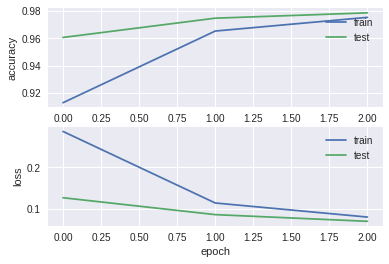

In [11]:
plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

## 將測試集輸入訓練過的模型做預測

In [0]:
prediction_OneHot = model.predict(x_test)
prediction = np.argmax(prediction_OneHot, axis = 1)

## 混淆矩陣 confusion matrix
- 我們可以使用混淆矩陣來檢視各個類別的數字圖片有多少是預測錯誤的 <br>
![](https://i.imgur.com/A0foSX8.png =400x)

In [13]:
pd.crosstab(y_test, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,972,0,0,1,0,0,1,1,4,1
1,0,1123,3,0,0,0,3,1,5,0
2,9,2,1002,0,4,0,3,7,5,0
3,0,0,4,990,0,4,0,6,5,1
4,1,0,1,0,956,0,3,4,1,16
5,5,0,0,5,1,870,6,2,2,1
6,8,2,0,1,3,5,936,0,3,0
7,1,5,3,0,0,0,0,1014,3,2
8,6,1,1,2,0,3,4,4,952,1


- 最後，我們來看看有哪些手寫數字圖片是判斷錯誤的

In [0]:
def plot_error_pred(images, labels, prediction, label_num):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    count= 0
    for i in range(0, len(images)):
        if not (labels[i] == label_num and prediction[i] != label_num):
            continue
        image = images[i]
        image = np.reshape(image,(28,28)).astype('float32')
        ax=plt.subplot(5, 5, 1+count) # 建立子圖形為5x5
        ax.imshow(image, cmap='binary') # 畫出子圖形
        
        title= "label: " + str(labels[i]) + ", prediction: " + str(prediction[i])
        
        ax.set_title(title,fontsize=12) # 設定title與大小
        ax.set_xticks([]);ax.set_yticks([]) # 設定不顯示刻度
        count += 1
        if count == 10: break;
        
    plt.show()

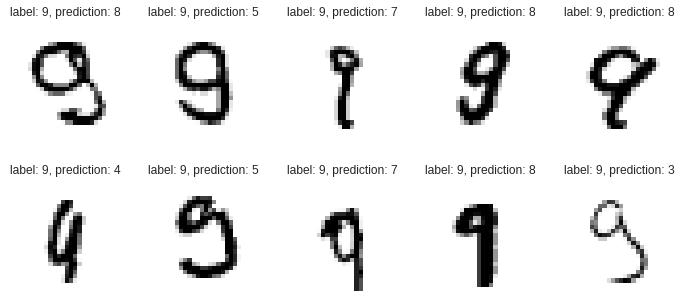

In [15]:
plot_error_pred(x_test, y_test, prediction, 9)